This notebook covers the initial exploration and preprocessing of the hotel booking dataset. It includes an Exploratory Data Analysis (EDA) that examines the structure and key features of the dataset, such as booking cancellations, customer demographics, and booking behaviors. The notebook also establishes baseline models for predicting cancellations, which will be refined in subsequent stages of the project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define the path to the CSV file
file_path = "../data/hotel_bookings.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Basic EDA

In [4]:
# Display the shape the DataFrame
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(119390, 32)

In [5]:
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Display the structure of the DataFrame
print("\nDataFrame information:")
df.info()


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64

In [7]:
# Generate summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
df.describe()


Summary statistics for numerical columns:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Generate summary statistics for categorical columns
categorical_stats = df.describe(include=['O'])
categorical_stats

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
# Check unique values for categorical columns
unique_values = {col: df[col].unique() for col in df.select_dtypes(include=['object']).columns}
unique_values

{'hotel': array(['Resort Hotel', 'City Hotel'], dtype=object),
 'arrival_date_month': array(['July', 'August', 'September', 'October', 'November', 'December',
        'January', 'February', 'March', 'April', 'May', 'June'],
       dtype=object),
 'meal': array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 'country': array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
        'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
        'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
        'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
        'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
        'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
        'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
        'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
        'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
        'PHL', 'SEN', 'SYC', 'A

In [10]:
#check for duplicate values
df.duplicated().sum()

31994

**There are 32000 duplicated values; however, since we do not have a primary identifier for each reservation, we can not say that these are duplicate values, might just be similar reservations. Therefore, I will not remove them, but I strongly suggest acquiring a primary key or identifier for each reservation for future analysis.**

In [11]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Given the high proportion of missing values in the company column, it might seem reasonable to drop it. However, as someone with a background in hospitality, I understand that the company information and proper market segmentation can be defining features in this context. Therefore, I will explore the missing values in relation to the guest's market segments. It appears that the majority of this hotel's customers stay for leisure and are not affiliated with a company.**

In [12]:
# Check the relationship between the 'company' column and the 'market_segment' column
# Specifically, we want to see how many 'corporate' market segments have their 'company' column missing
corporate_missing_company = df[(df['market_segment'] == 'Corporate') & (df['company'].isnull())].shape[0]

# Total number of 'corporate' market segments

total_corporate = df[df['market_segment'] == 'Corporate'].shape[0]

corporate_missing_company, total_corporate, (corporate_missing_company / total_corporate) * 100


(824, 5295, 15.561850802644003)

Here is the analysis of the company column in relation to the market_segment column:

- Total number of 'Corporate' market segments: 5,295
- Number of 'Corporate' market segments with missing 'company' values: 824
- Percentage of 'Corporate' market segments with missing 'company' values: 15.56%

So, 15.56% of the entries in the 'Corporate' market segment have missing values in the company column. This percentage is significant but not overwhelming, suggesting that the company column might still hold valuable information for a substantial portion of the 'Corporate' market segment.

# Handling Missing Values 

In [13]:
# Fill missing values for 'children' column with 0
df['children'].fillna(0, inplace=True)

# Fill missing values for 'country' with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Fill missing values for 'agent' and 'company' with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [14]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Features Selection

**First off, reservation_status and reservation_status_date are recorded after a guest checks in, they should not be included in the feature set used to predict cancellations. Including them would introduce data leakage, as these features are not available at the time of booking and can bias the model. Therefore I will drop them.**

In [15]:
df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

In [16]:
# List of categorical columns
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                       'deposit_type', 'customer_type', 'arrival_date_year', 
                       'arrival_date_week_number', 'arrival_date_day_of_month', 
                       'company', 'agent']

# Label encode the categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,0,5,26,0,0,0,2,...,2,3,0,0,0,0,2,0.00,0,0
1,1,0,737,0,5,26,0,0,0,2,...,2,4,0,0,0,0,2,0.00,0,0
2,1,0,7,0,5,26,0,0,1,1,...,2,0,0,0,0,0,2,75.00,0,0
3,1,0,13,0,5,26,0,0,1,1,...,0,0,0,221,0,0,2,75.00,0,0
4,1,0,14,0,5,26,0,0,2,2,...,0,0,0,174,0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,1,34,29,2,5,2,...,0,0,0,272,0,0,2,96.14,0,0
119386,0,0,102,2,1,34,30,2,5,3,...,4,0,0,9,0,0,2,225.43,0,2
119387,0,0,34,2,1,34,30,2,5,2,...,3,0,0,9,0,0,2,157.71,0,4
119388,0,0,109,2,1,34,30,2,5,2,...,0,0,0,78,0,0,2,104.40,0,0


In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.035378,-0.001270,0.001862,0.186596,0.234020,0.013183,...,0.307834,0.072820,-0.159021,0.649010,0.104937,-0.072432,-0.047531,-0.096719,0.218873,0.043390
is_canceled,-0.136531,1.000000,0.293123,0.016660,-0.001491,0.008148,-0.006130,-0.001791,0.024765,0.060017,...,-0.176028,-0.144381,0.468634,-0.046782,-0.081265,0.054186,-0.068140,0.047557,-0.195498,-0.234658
lead_time,-0.075381,0.293123,1.000000,0.040142,0.086228,0.126871,0.002268,0.085671,0.165799,0.119519,...,-0.172219,0.000149,0.375667,-0.011931,-0.085658,0.170084,0.073403,-0.063077,-0.116451,-0.095712
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.251837,-0.540561,-0.000221,0.021497,0.030883,0.029635,...,0.036141,0.030872,-0.064714,0.053847,0.036493,-0.056497,-0.006149,0.197580,-0.013684,0.108531
arrival_date_month,-0.035378,-0.001491,0.086228,-0.251837,1.000000,0.302228,-0.017938,-0.031869,-0.025746,-0.058284,...,-0.038134,-0.017854,0.068173,-0.038831,0.026738,0.048357,0.012029,-0.109004,-0.018589,-0.053047
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.302228,1.000000,0.066809,0.018208,0.015558,0.025909,...,-0.005684,0.005508,0.003891,-0.017611,-0.033718,0.022933,-0.028432,0.075791,0.001920,0.026149
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.017938,0.066809,1.000000,-0.016354,-0.028174,-0.001566,...,0.011646,0.010613,-0.001358,0.000033,0.003870,0.022728,0.012188,0.030245,0.008683,0.003062
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,-0.031869,0.018208,-0.016354,1.000000,0.498969,0.091871,...,0.086643,0.063281,-0.111435,0.163781,-0.077817,-0.054151,-0.109220,0.049342,-0.018554,0.072671
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,-0.025746,0.015558,-0.028174,0.498969,1.000000,0.092976,...,0.100795,0.096209,-0.076788,0.198519,-0.042749,-0.002020,-0.127223,0.065237,-0.024859,0.068192
adults,0.013183,0.060017,0.119519,0.029635,-0.058284,0.025909,-0.001566,0.091871,0.092976,1.000000,...,0.144779,-0.051673,-0.027644,0.024751,-0.161885,-0.008283,-0.101756,0.230641,0.014785,0.122884


**The reserved room type is highly correlated to the assigned room type and market segment to the distribution channel, and therefore, we will be dropping the distribution channel and assigned room type. This ensures that the model is not biased by highly correlated features and can improve performance and interpretability.**

In [19]:
# Function to find and drop highly correlated features
def drop_highly_correlated_features(corr_matrix, threshold=0.75):
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)
    return list(to_drop)

# Identify highly correlated features to drop
highly_correlated_features = drop_highly_correlated_features(corr_matrix)

# Drop the highly correlated features from the dataset
hotel_bookings = df.drop(columns=highly_correlated_features)
print(f'Dropped features: {highly_correlated_features}')

Dropped features: ['assigned_room_type', 'distribution_channel']


**Now, I am adding an extra feature for total guests**

In [20]:
# Create the total_guests feature
df['total_guests'] = df['adults'] + df['children']

In [21]:
#Save the cleaned df into csv
file_path = "../data/cleaned.csv"
df.to_csv(file_path, index=False)

# Data Pre Processing 

**First, we need to convert categorical columns to numerical representations before calculating the correlation matrix. Using LabelEncoder for this purpose can be an intermediate step to identify correlations**

In [22]:
# Define features and target
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

# Split the original data into training/validation, test, and incremental learning sets
X_train_val, X_temp, y_train_val, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_incremental, y_test, y_incremental = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
# List of categorical columns including numerical categories
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                       'deposit_type', 'customer_type', 'arrival_date_year', 
                       'arrival_date_week_number', 'arrival_date_day_of_month', 
                       'company', 'agent']

# List of true numerical columns
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                     'adults', 'children', 'babies', 'is_repeated_guest', 
                     'previous_cancellations', 'previous_bookings_not_canceled', 
                     'booking_changes', 'days_in_waiting_list', 'adr', 
                     'required_car_parking_spaces', 'total_of_special_requests']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ])

In [24]:
# Fit the preprocessor on the entire dataset to capture all categories
preprocessor.fit(X)

# Transform each subset
X_train_val_preprocessed = preprocessor.transform(X_train_val)
X_test_preprocessed = preprocessor.transform(X_test)
X_incremental_preprocessed = preprocessor.transform(X_incremental)

# Balance the Dataset Using SMOTE

**In this project, we aimed to develop a predictive model for hotel booking cancellations using a balanced and representative dataset. Initially, the dataset exhibited class imbalance, with a significantly higher number of non-canceled bookings compared to canceled ones. This imbalance could lead to biased model predictions, favoring the majority class and resulting in poor performance on the minority class. To address this issue, we applied the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples for the minority class by interpolating between existing samples, effectively balancing the class distribution without introducing significant bias. After applying SMOTE, the balanced dataset was then split into training, validation, and testing sets, with 20% reserved for incremental learning. This approach ensures that our model is trained on a balanced dataset, promoting fairness and improving its ability to generalize to both majority and minority classes.**

In [25]:
# Apply SMOTE to the training/validation set
smote = SMOTE(random_state=42)
X_train_val_resampled, y_train_val_resampled = smote.fit_resample(X_train_val_preprocessed, y_train_val)


In [26]:
# Split the resampled training/validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_resampled, y_train_val_resampled, test_size=0.25, random_state=42)

Training/Validation set size after SMOTE: 90354
Training set size: 67765
Validation set size: 22589
Testing set size: 23878
Incremental learning set size: 23878
Training set class distribution:
is_canceled
1    33915
0    33850
Name: count, dtype: int64


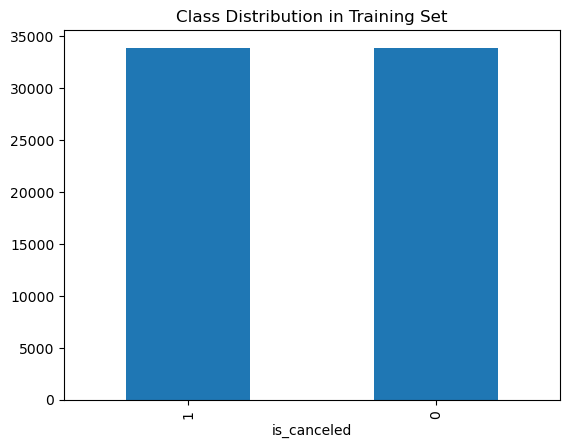

Validation set class distribution:
is_canceled
0    11327
1    11262
Name: count, dtype: int64


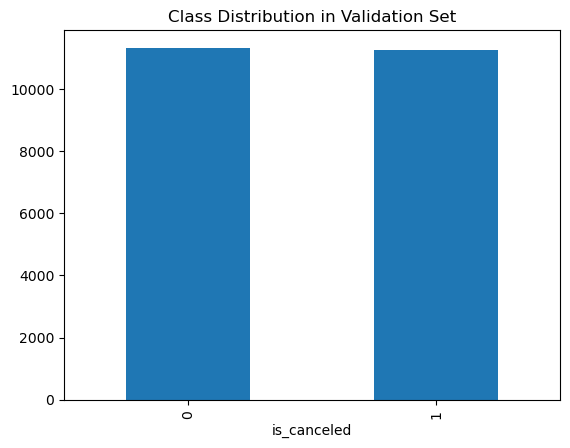

Testing set class distribution:
is_canceled
0    15071
1     8807
Name: count, dtype: int64


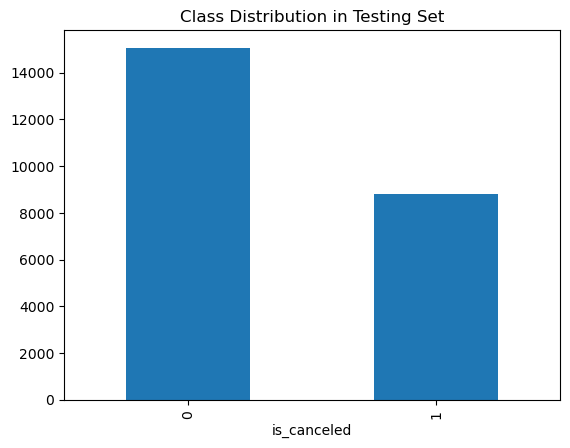

Incremental learning set class distribution:
is_canceled
0    14918
1     8960
Name: count, dtype: int64


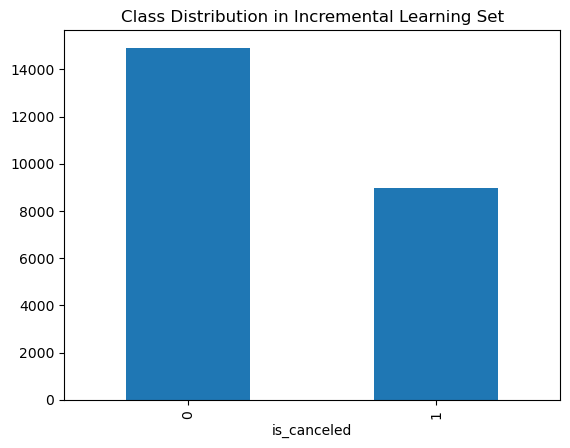

In [27]:
# Print the sizes of each set
print(f"Training/Validation set size after SMOTE: {len(X_train_val_resampled)}")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")
print(f"Incremental learning set size: {len(X_incremental)}")

# Check the balance in training, validation, and testing sets
print("Training set class distribution:")
print(y_train.value_counts())
y_train.value_counts().plot(kind='bar', title='Class Distribution in Training Set')
plt.show()

print("Validation set class distribution:")
print(y_val.value_counts())
y_val.value_counts().plot(kind='bar', title='Class Distribution in Validation Set')
plt.show()

print("Testing set class distribution:")
print(y_test.value_counts())
y_test.value_counts().plot(kind='bar', title='Class Distribution in Testing Set')
plt.show()

print("Incremental learning set class distribution:")
print(y_incremental.value_counts())
y_incremental.value_counts().plot(kind='bar', title='Class Distribution in Incremental Learning Set')
plt.show()


# # Create Predictions Based on the Rule:

In [28]:
def evaluate_model(y_test, y_pred):
    """
    Evaluate the performance of a classification model.
    
    Parameters:
    y_test (array-like): True labels.
    y_pred (array-like): Predicted labels by the model.
    
    Returns:
    dict: A dictionary containing evaluation metrics.
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }


In [29]:
# Rule-based prediction: if deposit_type > 0, predict cancellation (1), else no cancellation (0)
rule_based_predictions = df['deposit_type'].apply(lambda x: 1 if x > 0 else 0)

# True labels
y_true = df['is_canceled'].values


In [30]:
# Evaluate the rule-based model
rule_based_results = evaluate_model(y_true, rule_based_predictions)

Accuracy: 0.7494513778373398
Precision: 0.9851515356973354
Recall: 0.32855463096960924
F1 Score: 0.4927678768249877

Confusion Matrix:
[[74947   219]
 [29694 14530]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     75166
           1       0.99      0.33      0.49     44224

    accuracy                           0.75    119390
   macro avg       0.85      0.66      0.66    119390
weighted avg       0.82      0.75      0.71    119390



# Baseline model: 

In [31]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)


In [33]:
# Evaluate the model
evaluation_results_lr = evaluate_model(y_test, y_pred)
print(evaluation_results_lr)

Accuracy: 0.8329005779378508
Precision: 0.7472538753721384
Recall: 0.8265016464176224
F1 Score: 0.7848824671123571

Confusion Matrix:
[[12609  2462]
 [ 1528  7279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     15071
           1       0.75      0.83      0.78      8807

    accuracy                           0.83     23878
   macro avg       0.82      0.83      0.82     23878
weighted avg       0.84      0.83      0.83     23878

{'accuracy': 0.8329005779378508, 'precision': 0.7472538753721384, 'recall': 0.8265016464176224, 'f1': 0.7848824671123571, 'confusion_matrix': array([[12609,  2462],
       [ 1528,  7279]], dtype=int64), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.84      0.86     15071\n           1       0.75      0.83      0.78      8807\n\n    accuracy                           0.83     23878\n   macro avg       0.82      0.

# Random Forest Model

In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the Random Forest model and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model using the training set and validate using the validation set
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
# Make predictions on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Evaluate the model on the validation set
evaluation_results_val = evaluate_model(y_val, y_val_pred)

Accuracy: 0.9019876931249723
Precision: 0.912472647702407
Recall: 0.88865210442195
F1 Score: 0.9004048582995952

Confusion Matrix:
[[10367   960]
 [ 1254 10008]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11327
           1       0.91      0.89      0.90     11262

    accuracy                           0.90     22589
   macro avg       0.90      0.90      0.90     22589
weighted avg       0.90      0.90      0.90     22589



In [36]:
# Make predictions on the test set
X_test_preprocessed = preprocessor.transform(X_test)
y_test_pred = best_rf_model.predict(X_test_preprocessed)

# Evaluate the model on the test set
evaluation_results_rf = evaluate_model(y_test, y_test_pred)

Accuracy: 0.884077393416534
Precision: 0.8574641884692791
Recall: 0.8224139888724878
F1 Score: 0.8395734322475947

Confusion Matrix:
[[13867  1204]
 [ 1564  7243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     15071
           1       0.86      0.82      0.84      8807

    accuracy                           0.88     23878
   macro avg       0.88      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



# Decision Tree

I Will fit on the data before preprocessing to allow for the interpretability of feature importance. 

In [37]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
%time grid_search.fit(X_train_val, y_train_val)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: total: 5.52 s
Wall time: 16.3 s
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.8533656935699859


In [38]:
# Use the best model from GridSearchCV
best_dt = grid_search.best_estimator_


In [39]:
# Test the model
y_test_pred = best_dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.862635061562945
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     15071
           1       0.81      0.82      0.81      8807

    accuracy                           0.86     23878
   macro avg       0.85      0.85      0.85     23878
weighted avg       0.86      0.86      0.86     23878



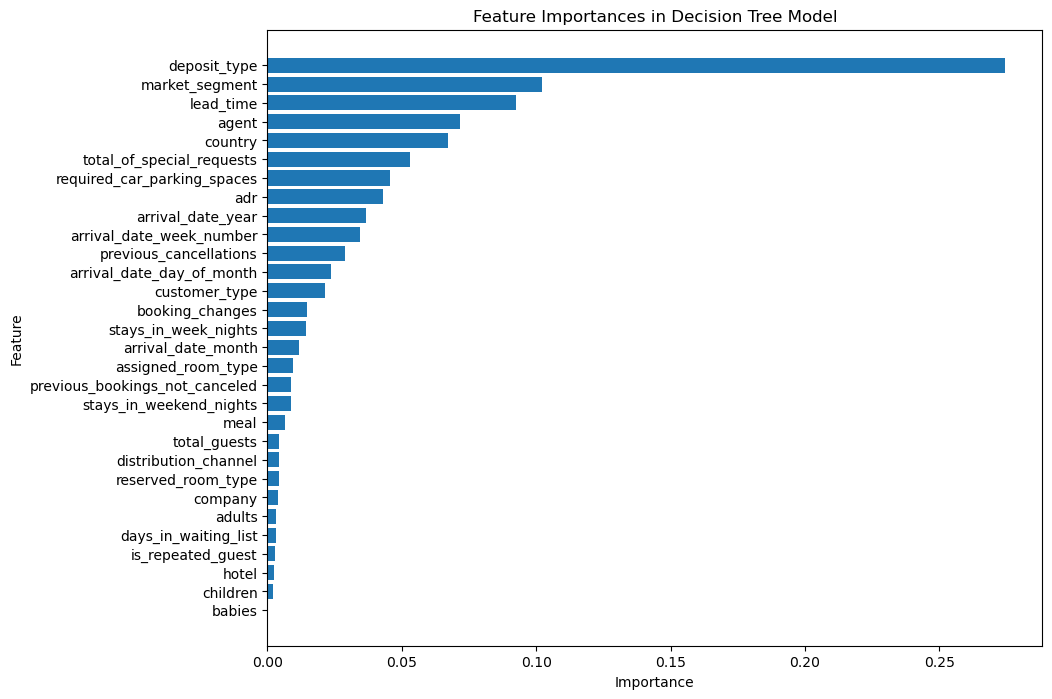

In [40]:
# Extract feature importances
importances = best_dt.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()

# Support Vector Machine (SVM)

In [41]:
# Initialize the SVM model with default parameters
svm_default = SVC(random_state=42)

# Fit the SVM model to the training data
%time svm_default.fit(X_train, y_train)

# Predict the test set labels using the default SVM model
y_test_pred_svm = svm_default.predict(X_test_preprocessed)

# Evaluate the model on the test set using your evaluate_model function
evaluation_results_svm = evaluate_model(y_test, y_test_pred_svm)

CPU times: total: 8min 51s
Wall time: 14min 26s
Accuracy: 0.8674930898735237
Precision: 0.7961582869738637
Recall: 0.8612467355512661
F1 Score: 0.8274244572924621

Confusion Matrix:
[[13129  1942]
 [ 1222  7585]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     15071
           1       0.80      0.86      0.83      8807

    accuracy                           0.87     23878
   macro avg       0.86      0.87      0.86     23878
weighted avg       0.87      0.87      0.87     23878



# K-Nearest Neighbors (KNN)

In [42]:
# Create the KNN model with default parameters
knn_default = KNeighborsClassifier()

# Fit the KNN model to the training data
%time knn_default.fit(X_train, y_train)

# Predict the test set labels using the default KNN model
y_test_pred_knn = knn_default.predict(X_test_preprocessed)

# Evaluate the model on the test set using your evaluate_model function
evaluation_results_test_knn = evaluate_model(y_test, y_test_pred_knn)

CPU times: total: 0 ns
Wall time: 43.9 ms
Accuracy: 0.785409163246503
Precision: 0.6613228208497591
Recall: 0.8571590780061314
F1 Score: 0.7466126001384631

Confusion Matrix:
[[11205  3866]
 [ 1258  7549]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     15071
           1       0.66      0.86      0.75      8807

    accuracy                           0.79     23878
   macro avg       0.78      0.80      0.78     23878
weighted avg       0.81      0.79      0.79     23878



# Gradient Boosting Machines (GBM)

In [43]:
# Create the Gradient Boosting model with default parameters
gbm_default = GradientBoostingClassifier(random_state=42)

# Fit the Gradient Boosting model to the training data
%time gbm_default.fit(X_train, y_train)

# Predict the test set labels using the default Gradient Boosting model
y_test_pred_gbm = gbm_default.predict(X_test_preprocessed)

# Evaluate the model on the test set using your evaluate_model function
evaluation_results_test_gbm = evaluate_model(y_test, y_test_pred_gbm)

CPU times: total: 1min 35s
Wall time: 2min 40s
Accuracy: 0.8528771253873859
Precision: 0.7945037828215399
Recall: 0.8108322924946065
F1 Score: 0.8025849957853329

Confusion Matrix:
[[13224  1847]
 [ 1666  7141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     15071
           1       0.79      0.81      0.80      8807

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878



# Comparison with Machine Learning Model

 Summary:
 
The rule-based model has a high precision but a very low recall, indicating it predicts cancellations accurately but misses a lot of actual cancellations.
The machine learning model has a more balanced performance with good precision and recall, leading to a higher F1 score.
Overall, the machine learning model performs significantly better, especially in terms of recall and F1 score, making it a more reliable predictor for cancellations compared to the rule-based approach.
By comparing these metrics, it is evident that the machine learning model is superior to the simple rule-based approach based on the deposit_type feature. This justifies the use of the more complex model for predicting booking cancellations.